In [2]:
import bnlearn as bn
# Load dataset with 10.000 samples
df = bn.import_example('asia', n=10000)
# Print to screen
df.head()

[bnlearn] >Extracting files..


Generating for node: dysp: 100%|██████████| 8/8 [00:00<00:00, 167.01it/s]


,asia,tub,smoke,lung,bronc,either,xray,dysp
0,1,1,1,1,0,1,1,0
1,1,1,1,1,1,1,1,1
2,1,1,0,1,0,1,1,0
3,1,1,0,1,1,1,1,1
4,1,1,1,1,0,1,1,0


In [3]:
edges = [('smoke', 'lung'),
         ('smoke', 'bronc'),
         ('lung', 'xray'),
         ('bronc', 'xray')]

[bnlearn] >bayes DAG created.
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


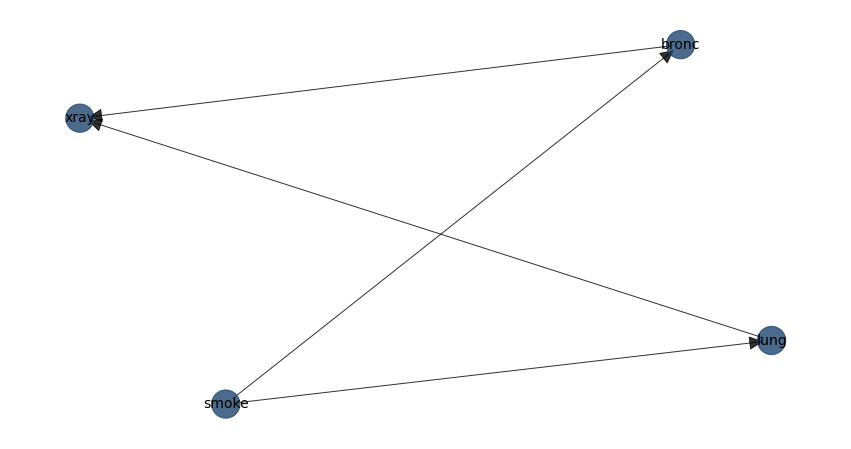

{'pos': {'smoke': array([-0.59414777, -0.95865326]),
  'lung': array([ 0.92352932, -0.61488544]),
  'bronc': array([0.67061845, 0.98559506]),
  'xray': array([-1.        ,  0.58794365])},
 'G': <networkx.classes.digraph.DiGraph at 0x1f2e15d3e80>,
 'node_properties': {'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('smoke', 'lung'): {'color': '#000000', 'weight': 1},
  ('smoke', 'bronc'): {'color': '#000000', 'weight': 1},
  ('lung', 'xray'): {'color': '#000000', 'weight': 1},
  ('bronc', 'xray'): {'color': '#000000', 'weight': 1}}}

In [4]:
# Create the DAG from the edges
DAG = bn.make_DAG(edges)

# Plot and make sure the arrows are correct.
bn.plot(DAG)

In [5]:
# Check the current CPDs in the DAG.
bn.print_CPD(DAG)
# [bnlearn] >No CPDs to print. Tip: use bn.plot(DAG) to make a plot.
# This is correct, we dit not yet specify any CPD.

# Learn the parameters from data set.
# As input we have the DAG without CPDs.
DAG = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

# Print the CPDs
bn.print_CPD(DAG)
# At this point we have a DAG with the learned CPDs

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Removing columns from dataframe to make consistent with DAG [['asia' 'tub' 'either' 'dysp']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of smoke:
+----------+----------+
| smoke(0) | 0.504545 |
+----------+----------+
| smoke(1) | 0.495455 |
+----------+----------+
[bnlearn] >CPD of lung:
+---------+--------------------+---------------------+
| smoke   | smoke(0)           | smoke(1)            |
+---------+--------------------+---------------------+
| lung(0) | 0.1390990990990991 | 0.05614678899082569 |
+---------+--------------------+---------------------+
| lung(1) | 0.8609009009009009 | 0.9438532110091743  |
+---------+--------------------+---------------------+
[bnlearn] >CPD of bronc:
+----------+--------------------+--------------------+
| smoke    | smoke(0)           | smoke(1)          

In [6]:
# Structure learning on the data set
model = bn.structure_learning.fit(df)
# Compute significance
model = bn.independence_test(model, df, prune=True)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute edge strength with [chi_square]


[bnlearn]> Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


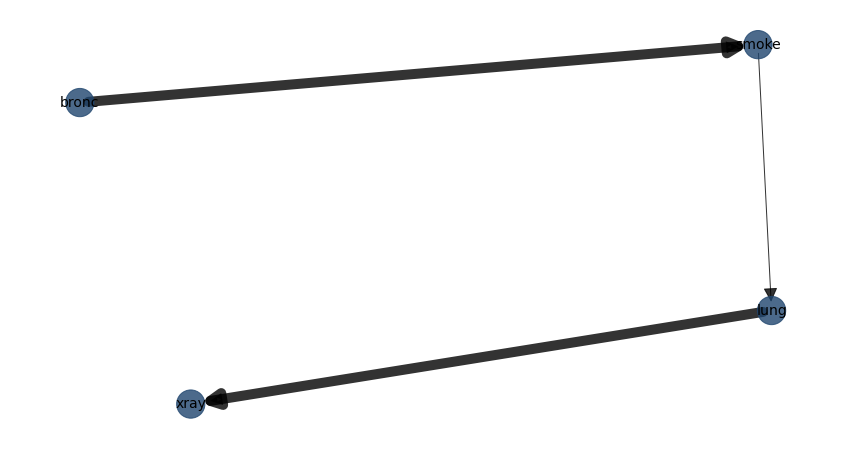

[bnlearn]> Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


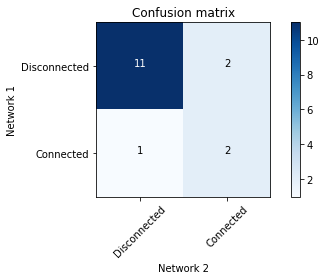

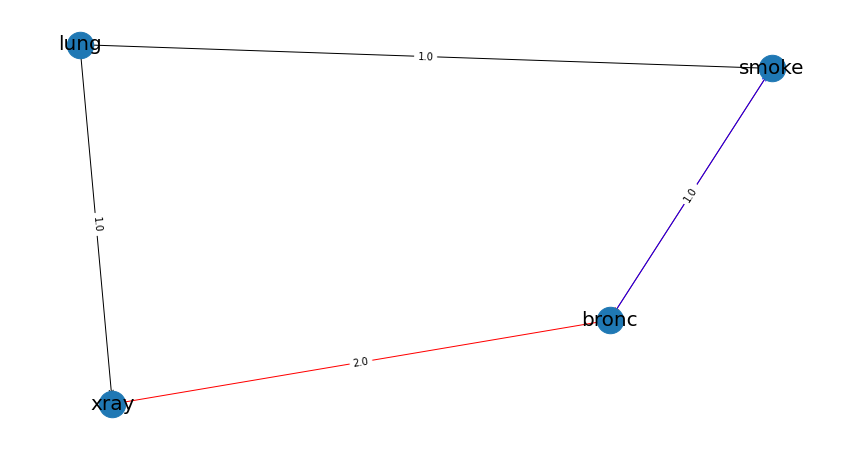

(array([[11,  2],
        [ 1,  2]], dtype=int64),
 target  smoke  lung  bronc  xray
 source                          
 smoke       0     1      2     0
 lung        0     0      0     1
 bronc      -1     0      0     2
 xray        0     0      0     0)

In [7]:
# Plot the DAG
bn.plot(model, interactive=False)
bn.plot(model, interactive=True)

# Plot differences between expert-DAG and the computed-DAG
bn.compare_networks(model, DAG)